In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
pd.options.display.max_columns = 50

In [2]:
df = pd.read_csv('Data for Cleaning & Modeling.csv', low_memory = False)

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,< 1 year,RENT,85000.0,VERIFIED - income,Aug-09,Due to a lack of personal finance education an...,debt_consolidation,Debt consolidation for on-time payer,941xx,CA,19.48,0.0,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,< 1 year,RENT,65000.0,not verified,May-08,Just want to pay off the last bit of credit ca...,credit_card,Credit Card payoff,112xx,NY,14.29,0.0,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,1 year,RENT,70000.0,VERIFIED - income,Aug-14,Trying to pay a friend back for apartment brok...,debt_consolidation,mlue,100xx,NY,10.50,0.0,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,10+ years,OWN,54000.0,not verified,Mar-10,"If funded, I would use this loan consolidate t...",debt_consolidation,zxcvb,777xx,TX,5.47,0.0,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,57416.0,139635.0,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,6 years,RENT,32000.0,not verified,Nov-09,I currently have a personal loan with Citifina...,debt_consolidation,Nicolechr1978,067xx,CT,11.63,0.0,Dec-96,1.0,58.0,NaN,14.0,0.0,3511.0,25.60%,40.0,f


#### Checking for nulls in the y label

In [4]:
df['X1'].isnull().sum()

61010

#### Since the y label has nulls we can't do anything with the rows having null target values, so we'll need to drop them

In [5]:
df = df.dropna(axis = 0, subset = 'X1')
df.shape

(338990, 32)

In [6]:
df_testing = pd.read_csv('Holdout for Testing.csv', low_memory = False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  object 
 1   X2      338989 non-null  float64
 2   X3      338989 non-null  float64
 3   X4      338989 non-null  object 
 4   X5      338989 non-null  object 
 5   X6      338989 non-null  object 
 6   X7      338989 non-null  object 
 7   X8      287123 non-null  object 
 8   X9      287123 non-null  object 
 9   X10     318733 non-null  object 
 10  X11     324195 non-null  object 
 11  X12     287030 non-null  object 
 12  X13     287238 non-null  float64
 13  X14     338989 non-null  object 
 14  X15     338989 non-null  object 
 15  X16     105056 non-null  object 
 16  X17     338989 non-null  object 
 17  X18     338973 non-null  object 
 18  X19     338989 non-null  object 
 19  X20     338989 non-null  object 
 20  X21     338989 non-null  float64
 21  X22     33

### Since, X25 only has only 43,400 non-null values, exploring that next to see if we can impute it or we'll need to drop it

0.0     704
1.0     924
2.0    1237
3.0    1445
4.0    1805
Name: X25, dtype: int64

<AxesSubplot:>

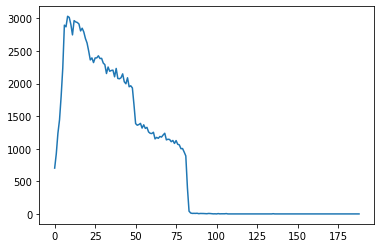

In [8]:
display(df['X25'].value_counts().sort_index().head())
df['X25'].value_counts().sort_index().plot()

#### Since X25 refers to number of months since borrowers last delinquency and has a lot of non-null values, but since X22 (number of 30+ days deliquecncy) seems co-related with what X25 represents, checking the corelation with X25 being null and X22 to see if we can impute X25

In [9]:
df[df['X25'].isnull()][['X22']].value_counts()

X22 
0.0     185102
1.0        220
2.0         36
3.0         29
4.0         14
5.0         14
6.0         14
7.0          9
8.0          6
9.0          5
10.0         2
11.0         1
12.0         1
13.0         1
14.0         1
15.0         1
dtype: int64

#### Since a vast majority of null values in X25 correspond to 0 number of 30+ days past-due incidences of delinquency in past two years, we can conclude that missing values can be concluded
#### We can impute missing values in X25 as 0.0

In [10]:
df.loc[:,'X25'] = df['X25'].fillna(0)
df_testing.loc[:, 'X25'] = df_testing['X25'].fillna(0)

In [11]:
df[['X25', 'X22']].corr()

,X25,X22
X25,1.000000,-0.054841
X22,-0.054841,1.000000


#### The values still look uncorrelated

### Converting strings to numbers

In [12]:
import locale
locale.setlocale(locale.LC_ALL, '')

def convert_string_to_float(value):
    try:
        return locale.atof(value[1:])
    except:
        return value
    
def convert_percentage_to_float(value):
    try:
        return locale.atof(value[:-1])
    except:
        return value

In [13]:
df['X4'] = df['X4'].apply(lambda value: convert_string_to_float(value))
df['X5'] = df['X5'].apply(lambda value: convert_string_to_float(value))
df['X6'] = df['X6'].apply(lambda value: convert_string_to_float(value))
df['X1'] = df['X1'].apply(lambda value: convert_percentage_to_float(value))
df['X30'] = df['X30'].apply(lambda value: convert_percentage_to_float(value))

df_testing['X4'] = df_testing['X4'].apply(lambda value: convert_string_to_float(value))
df_testing['X5'] = df_testing['X5'].apply(lambda value: convert_string_to_float(value))
df_testing['X6'] = df_testing['X6'].apply(lambda value: convert_string_to_float(value))
df_testing['X1'] = df_testing['X1'].apply(lambda value: convert_percentage_to_float(value))
df_testing['X30'] = df_testing['X30'].apply(lambda value: convert_percentage_to_float(value))

### Checking correlation among variables to drop highly correlated variables

In [14]:
import seaborn as sns

<AxesSubplot:>

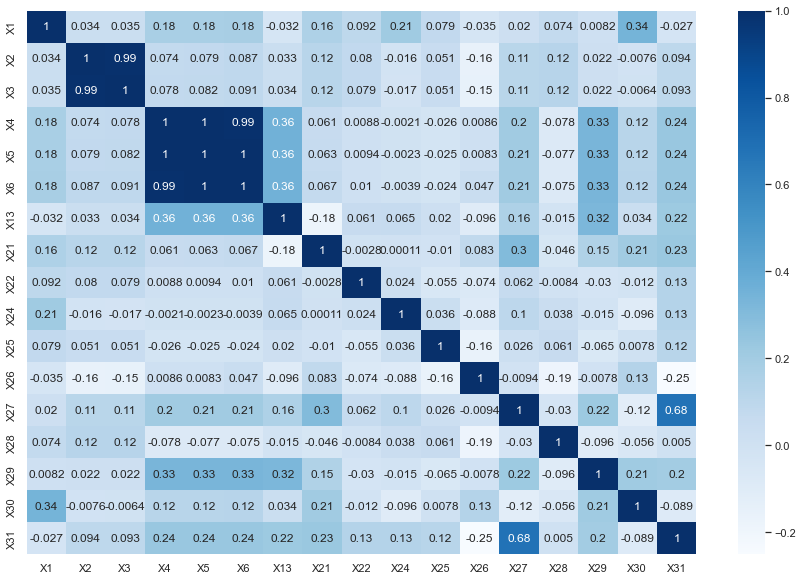

In [15]:
# plot the heatmap
sns.set(rc={'figure.figsize':(15, 10)})
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [16]:
## Dropping highly corelated columns
df = df.drop(axis = 1, columns = ['X2', 'X4', 'X6'])
## Also, Since Loan ID won't be useful in prediction, we can drop it regardless 
df = df.drop(axis = 1, columns = ['X3'])

## Dropping highly corelated columns
df_testing = df_testing.drop(axis = 1, columns = ['X2', 'X4', 'X6'])
## Also, Since Loan ID won't be useful in prediction, we can drop it regardless 
df_testing = df_testing.drop(axis = 1, columns = ['X3'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338990 entries, 0 to 399999
Data columns (total 28 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      338990 non-null  float64
 1   X5      338989 non-null  float64
 2   X7      338989 non-null  object 
 3   X8      287123 non-null  object 
 4   X9      287123 non-null  object 
 5   X10     318733 non-null  object 
 6   X11     324195 non-null  object 
 7   X12     287030 non-null  object 
 8   X13     287238 non-null  float64
 9   X14     338989 non-null  object 
 10  X15     338989 non-null  object 
 11  X16     105056 non-null  object 
 12  X17     338989 non-null  object 
 13  X18     338973 non-null  object 
 14  X19     338989 non-null  object 
 15  X20     338989 non-null  object 
 16  X21     338989 non-null  float64
 17  X22     338989 non-null  float64
 18  X23     338989 non-null  object 
 19  X24     338989 non-null  float64
 20  X25     338990 non-null  float64
 21  X26     43

# Looking at individual columns

In [18]:
def check_nulls(column):
    print(f'Percentage of nulls = {column.isnull().sum()/len(column)*100}') 
    print(f'# Null values = {column.isnull().sum()}')

## X5 - Loan amount funded

In [19]:
check_nulls(df['X5'])
check_nulls(df_testing['X5'])

Percentage of nulls = 0.0002949939526239712
# Null values = 1
Percentage of nulls = 0.0
# Null values = 0


#### Since there is only one null value in df, we can drop it

In [20]:
df = df.dropna(axis = 0, subset = 'X5')

<AxesSubplot:>

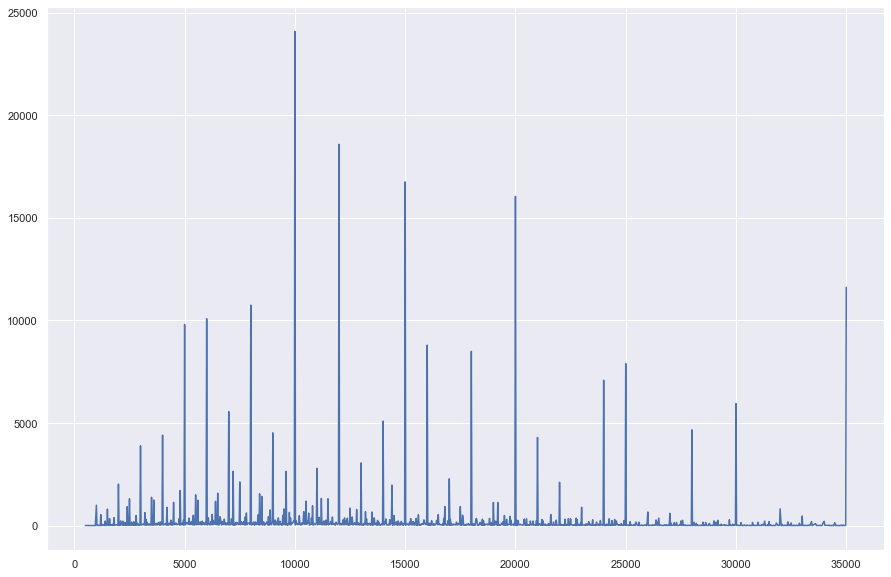

In [21]:
df['X5'].value_counts().sort_index().plot()

## X7 - Number of payments

In [22]:
check_nulls(df['X7'])
check_nulls(df_testing['X7'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


In [23]:
df['X7'].value_counts()

 36 months    247791
 60 months     91198
Name: X7, dtype: int64

##### Converting to categorical data

In [24]:
df['X7'][1]

' 36 months'

In [25]:
df.loc[:, 'X7'] = df['X7'].apply(lambda flag: 0 if flag.strip() == '36 months' else 1)
df_testing.loc[:, 'X7'] = df_testing['X7'].apply(lambda flag: 0 if flag.strip() == '36 months' else 1)

In [26]:
df['X7'].value_counts()

0    247791
1     91198
Name: X7, dtype: int64

In [27]:
df_testing['X7'].value_counts()

0    53630
1    26370
Name: X7, dtype: int64

## X8 - Grade of loan

In [28]:
check_nulls(df['X8'])
check_nulls(df_testing['X8'])

Percentage of nulls = 15.300201481464
# Null values = 51866
Percentage of nulls = 0.0
# Null values = 0


<AxesSubplot:>

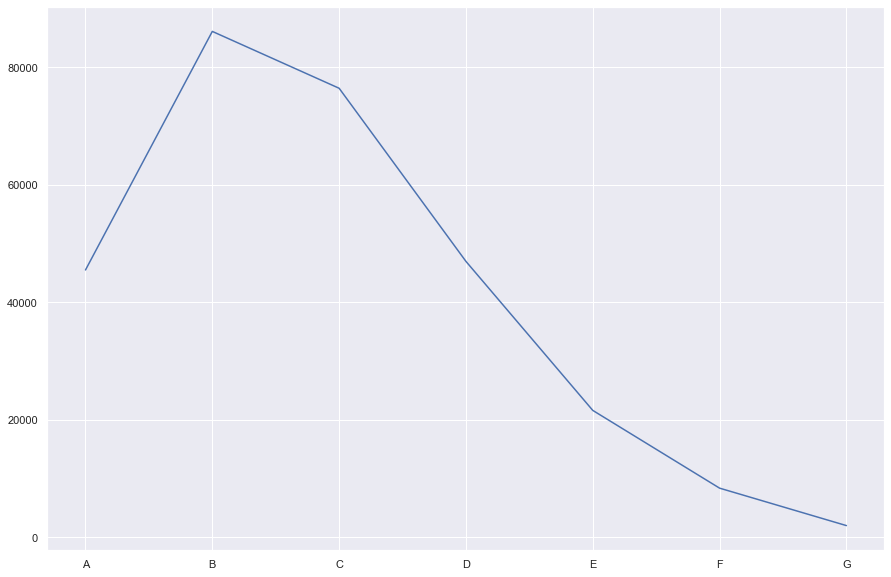

In [29]:
df['X8'].value_counts().sort_index().plot()

#### Based on general banking practices, longer term loans have lower grades, and subsequently higher interest rates, thus, rather than imputing missing values are mode or median, if we can replace them by median of those two subgroups, we can get better results than replacing by overall median 

In [30]:
df.loc[(df['X7'] == 0) & (df['X8'].isnull()), 'X8'] = df[df['X7'] == 0]['X8'].mode()[0]
df.loc[(df['X7'] == 1) & (df['X8'].isnull()), 'X8'] = df[df['X7'] == 1]['X8'].mode()[0]

In [31]:
df['X8'].value_counts()

B    123933
C     90500
D     46984
A     45525
E     21628
F      8395
G      2024
Name: X8, dtype: int64

In [32]:
df['X8'] = df['X8'].map({
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5,
    'G' : 6
})

In [33]:
df_testing.loc[(df_testing['X7'] == 0) & (df_testing['X8'].isnull()), 'X8'] = \
    df_testing[df_testing['X7'] == 0]['X8'].mode()[0]
df_testing.loc[(df_testing['X7'] == 1) & (df_testing['X8'].isnull()), 'X8'] = \
    df_testing[df_testing['X7'] == 1]['X8'].mode()[0]

In [34]:
df_testing['X8'] = df_testing['X8'].map({
    'A' : 0,
    'B' : 1,
    'C' : 2,
    'D' : 3,
    'E' : 4,
    'F' : 5,
    'G' : 6
})

In [35]:
df['X8'].value_counts()

1    123933
2     90500
3     46984
0     45525
4     21628
5      8395
6      2024
Name: X8, dtype: int64

## X9 - Subgrades of loan

In [36]:
check_nulls(df['X9'])
check_nulls(df_testing['X9'])

Percentage of nulls = 15.300201481464
# Null values = 51866
Percentage of nulls = 0.0
# Null values = 0


<AxesSubplot:>

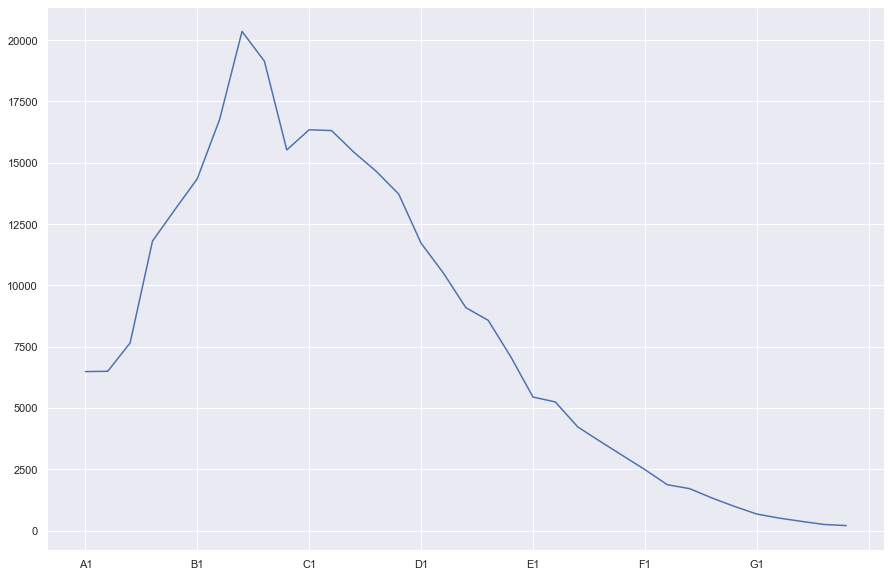

In [37]:
df['X9'].value_counts().sort_index().plot()

In [38]:
df.loc[(df['X8'] == 0) & (df['X9'].isnull()), 'X9'] = 'A2'

In [39]:
df.loc[(df['X8'] == 1) & (df['X9'].isnull()), 'X9'] = 'B2'

In [40]:
df.loc[(df['X8'] == 2) & (df['X9'].isnull()), 'X9'] = 'C2'

In [41]:
df.loc[(df['X8'] == 3) & (df['X9'].isnull()), 'X9'] = 'D2'

In [42]:
df.loc[(df['X8'] == 4) & (df['X9'].isnull()), 'X9'] = 'E2'

In [43]:
df.loc[(df['X8'] == 5) & (df['X9'].isnull()), 'X9'] = 'F2'

In [44]:
df.loc[(df['X8'] == 6) & (df['X9'].isnull()), 'X9'] = 'G2'

In [45]:
df['X9'] = df['X9'].str.replace('A', '0').str.replace('B', '1')\
                .str.replace('C', '2').str.replace('D', '3')\
                .str.replace('E', '4').str.replace('F', '5')\
                .str.replace('G', '6').astype(int)

df_testing['X9'] = df_testing['X9'].str.replace('A', '0').str.replace('B', '1')\
                .str.replace('C', '2').str.replace('D', '3')\
                .str.replace('E', '4').str.replace('F', '5')\
                .str.replace('G', '6').astype(int)

## X10 - Employer or job title

In [46]:
check_nulls(df['X10'])
check_nulls(df_testing['X10'])

Percentage of nulls = 5.975415131464443
# Null values = 20256
Percentage of nulls = 5.4925
# Null values = 4394


In [47]:
df['X10'] = df['X10'].fillna('missing').str.lower()
df_testing['X10'] = df_testing['X10'].fillna('missing').str.lower()

In [48]:
df['X10'].value_counts()

missing                              20256
teacher                               4421
manager                               3908
registered nurse                      2170
supervisor                            1897
                                     ...  
genetic technologies, inc                1
mobile productivity inc                  1
401 e. ontario condo. assn.              1
skyjack                                  1
senior creative designer/ad sales        1
Name: X10, Length: 146990, dtype: int64

#### Since there are 160k+ unique values for profession, we'll need to do some topic modelling 

In [49]:
professions = [i.strip() for i in list(np.unique(df['X10'].value_counts().index.str.lower().values))]
profession_df = pd.DataFrame(professions, columns = ['data'])
profession_df.head()

,data
0,mother theresa home
1,quitman street community school
2,bus operator and instructor
3,fibro source
4,long ilsand college hospital


In [50]:
def assign_to_category_X10(description):
    if('school' in description or 'teach' in description or 'prof' in description or 'instruct' in description or 'university' in description or 'edu' in description):
        return 'teacher'
    if('sale' in description or 'cashier' in description):
        return 'sales'
    if('drive' in description or 'transport' in description or 'goods' in description or 'carrier' in description):
        return 'transportation'
    if('nurse' in description or 'rn' in description or 'doc' in description or 'physician' in description or 'hospital' in description or 'eye' in description 
       or 'health' in description or 'medic' in description or 'vet' in description or 'wellnes' in description or 'fit' in description or 'cancer' in description
       or 'therap' in description or 'dr' in description or 'pharma' in description or 'care' in description):
        return 'healthcare'
    if('exec' in description or 'manager' in description or 'supervisor' in description or 'director' in description or 'president' in description or 'owner' in description
      or 'mgmt' in description or 'ceo' in description or 'cfo' in description or 'management' in description or 'partner' in description or 'vp' in description or 'mgr' in description):
        return 'management'
    if('engineer' in description or 'foreman' in description or 'mechanic' in description or 'security' in description or 'clerk' in description or 'technician' in description 
       or 'electrician' in description or 'machin' in description or 'cook' in description or 'server' in description or 'drill' in description or 'weld' in description
       or 'material' in description or 'operator' in description or 'spare' in description or 'parts' in description or 'assist' in description or 'recept' in description
       or 'attendant' in description or 'plumber' in description or 'painter' in description or 'agent' in description or 'labor' in description or 'realtor' in description
       or 'install' in description or 'chef' in description or 'super' in description or 'bar' in description or 'electric' in description or 'restraunt' in description):
        return 'blue collar'
    if('develop' in description or 'software' in description or 'analyst' in description or 'tech' in description or 'system' in description or 'solution' in description
       or 'associate' in description or 'it' in description or 'designer' in description):
        return 'software'
    if('bank' in description or 'book' in description or 'cash' in description or 'account' in description or 'law' in description or 'legal' in description 
       or 'teller' in description or 'credit' in description or 'revenue' in description or 'fin' in description or 'insur' in description):
        return 'finance & law'
    if('poli' in description or 'army' in description or 'us' in description or 'firefighter' in description or 'u.s.' in description or 'service' in description 
       or 'sanitation' in description or ' of ' in description or ' city' in description or 'officer' in description
      or 'center' in description): ## 'of' in the middle of sentence usually refers to a public service like(city of newyork, department of transit, etc)
        return 'public service'
    if('co' in description or 'inc' in description or 'group' in description or 'ltd' in description or '&' in description or 'llc' in description):
        return 'company'
    if('ups' in description or 'walmart' in description or 'goldman' in description or 'cna' in description or 'wells fargo' in description or 'home depot' in description or 'lowe' in description
       or 'gmc' in description or 'market' in description or 'chase' in description or 'hotel' in description or 'ge' in description or 'wal-mart' in description or 'target' in description or 'walgreens' in description):
        return 'big companies'
    if('specialist' in description or 'senior' in description or 'lead' in description or 'sr' in description or 'admin' in description ):
        return 'specialist'
    return description

In [51]:
df['X10'] = df['X10'].apply(lambda description: assign_to_category_X10(description))
df_testing['X10'] = df_testing['X10'].apply(lambda description: assign_to_category_X10(description))

In [52]:
top_categories = df['X10'].value_counts().index[:11]
df['X10'] = df['X10'].apply(lambda x: x if x in top_categories else 'others')
df_testing['X10'] = df_testing['X10'].apply(lambda x: x if x in top_categories else 'others')

In [53]:
df['X10'].value_counts()

others            72108
management        48218
healthcare        34391
software          33699
company           33361
blue collar       29640
public service    23591
missing           20256
teacher           17259
finance & law     11246
sales              7792
big companies      7428
Name: X10, dtype: int64

In [54]:
df['X10'].isnull().sum()

0

#### Since we have 12 categories, we can do target encoding (becuase one hot encoding will add many features)

In [55]:
mean_target = df.groupby('X10')['X1'].mean()

In [56]:
# Replace the original categorical values with the mean target value
df['X10_target_encoded'] = df['X10'].map(mean_target)

# To prevent information leakage, using values from train dataset
df_testing['X10_target_encoded'] = df_testing['X10'].map(mean_target)

## X11 - Number of years employed

In [57]:
check_nulls(df['X11'])
check_nulls(df_testing['X11'])

Percentage of nulls = 4.36415340910767
# Null values = 14794
Percentage of nulls = 5.4775
# Null values = 4382


In [58]:
df['X11'].value_counts()

10+ years    108491
2 years       30117
3 years       26670
< 1 year      26003
5 years       23072
1 year        21432
4 years       20259
6 years       19601
7 years       19445
8 years       16212
9 years       12893
Name: X11, dtype: int64

In [59]:
df[df['X11'].isnull()]['X10'].value_counts()

missing           14662
others               42
public service       14
company              13
software             12
healthcare           10
management           10
blue collar          10
teacher               9
big companies         5
finance & law         4
sales                 3
Name: X10, dtype: int64

#### Since we can see people who have missing values in number of years employed also have missing values in 'employer or job title' hence, we can replace na values as 0 year

In [60]:
df.loc[(df['X11'].isnull()) & (df['X10'] == 'missing'), 'X11'] = '0 year'
df_testing.loc[(df_testing['X11'].isnull()) & (df_testing['X10'] == 'missing'), 'X11'] = '0 year'

In [61]:
df['X11'].value_counts()

10+ years    108491
2 years       30117
3 years       26670
< 1 year      26003
5 years       23072
1 year        21432
4 years       20259
6 years       19601
7 years       19445
8 years       16212
0 year        14662
9 years       12893
Name: X11, dtype: int64

In [62]:
df['X11'].isnull().sum()

132

In [63]:
df = df.drop(axis = 1, columns = ['X10'])
df_testing = df_testing.drop(axis = 1, columns = ['X10'])

#### Replacing remaining null values with mode

In [64]:
df['X11'] = df['X11'].fillna(df['X11'].mode()[0])
df_testing['X11'] = df_testing['X11'].fillna(df['X11'].mode()[0])

<AxesSubplot:>

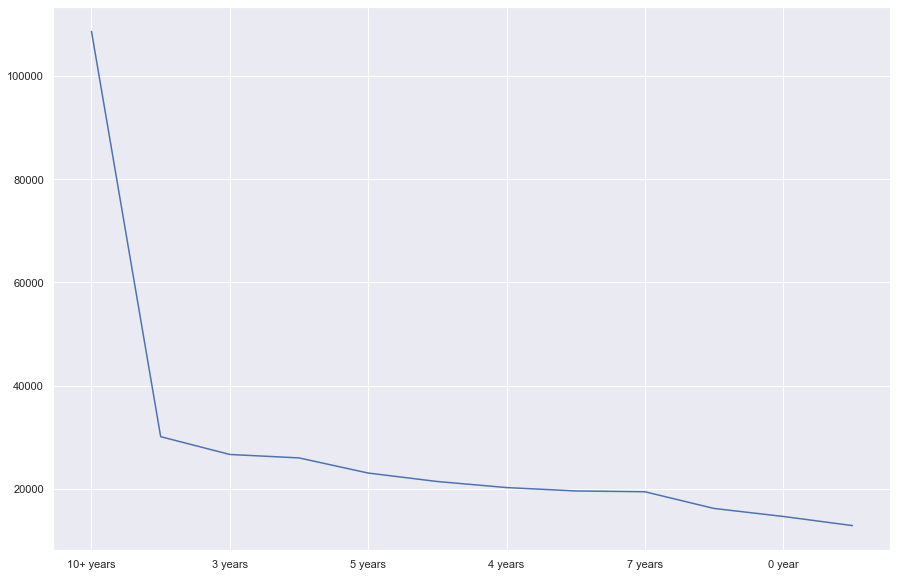

In [65]:
df['X11'].value_counts().plot()

In [66]:
df['X11'] = df['X11'].str.extract(r'(\d+)').astype(int)
df_testing['X11'] = df_testing['X11'].str.extract(r'(\d+)').astype(int)

### X12 - Home ownership status

In [67]:
check_nulls(df['X12'])
check_nulls(df_testing['X12'])

Percentage of nulls = 15.327635999988201
# Null values = 51959
Percentage of nulls = 0.0
# Null values = 0


In [68]:
df['X12'].value_counts()

MORTGAGE    145958
RENT        115958
OWN          24976
OTHER          107
NONE            30
ANY              1
Name: X12, dtype: int64

In [69]:
df['X12'] = df['X12'].str.replace('NONE', 'OTHER')
df['X12'] = df['X12'].str.replace('ANY', 'OTHER')

<AxesSubplot:>

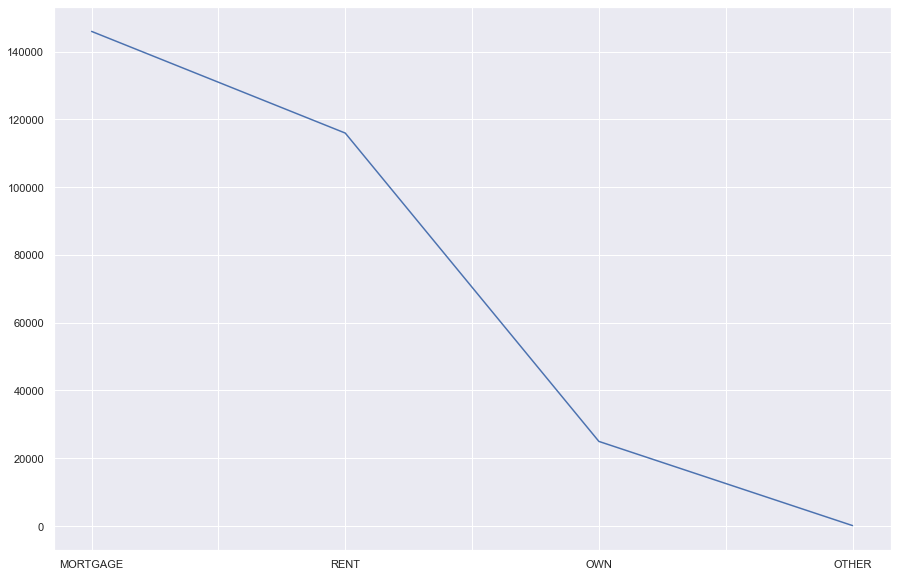

In [70]:
df['X12'].value_counts().plot()

In [71]:
print(df[df['X12'] == 'MORTGAGE']['X13'].mean())
print(df[df['X12'] == 'RENT']['X13'].mean())

83247.02745891706
62244.18106833083


### Since people who have mortages have higher income, we can impute missing values using that

In [72]:
def impute_missing_X12(row):
    if(row['X13'] < 70000):
        return 'RENT'
    return 'MORTGAGE'

In [73]:
from tqdm import tqdm
tqdm.pandas()

In [74]:
df['X12'] = df.progress_apply(lambda row: impute_missing_X12(row) if isinstance(row['X12'], float) else row['X12'], axis = 1)

100%|██████████████████████████████████████████████████████████████████████| 338989/338989 [00:02<00:00, 139154.09it/s]


<AxesSubplot:>

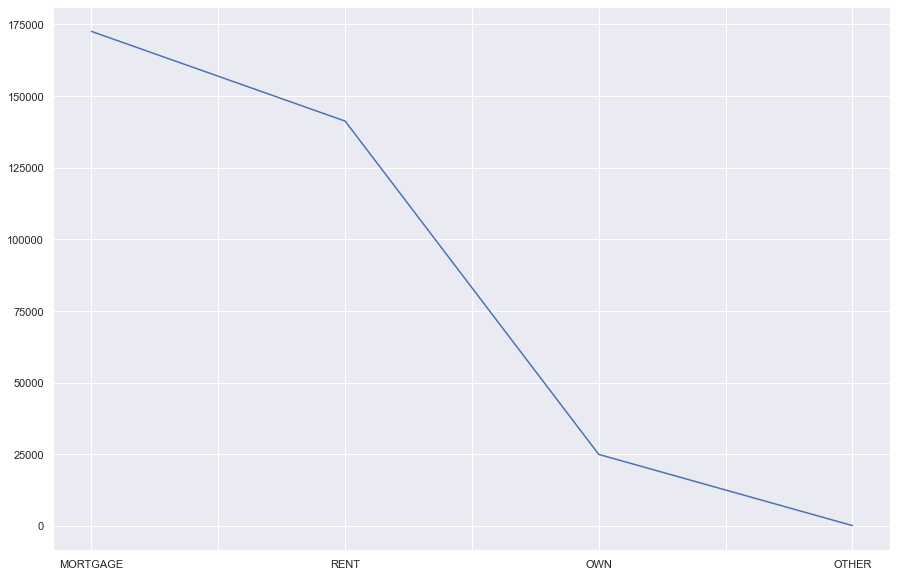

In [75]:
df['X12'].value_counts().plot()

In [76]:
df['X12'] = df['X12'].map({
    'OWN':0,'RENT':1,'MORTGAGE':2,'OTHER':3
})

df_testing['X12'] = df_testing['X12'].map({
    'OWN':0,'RENT':1,'MORTGAGE':2,'OTHER':3
})

### X13 - Salary

In [77]:
check_nulls(df['X13'])
check_nulls(df_testing['X13'])

Percentage of nulls = 15.266277076837302
# Null values = 51751
Percentage of nulls = 0.0
# Null values = 0


<AxesSubplot:>

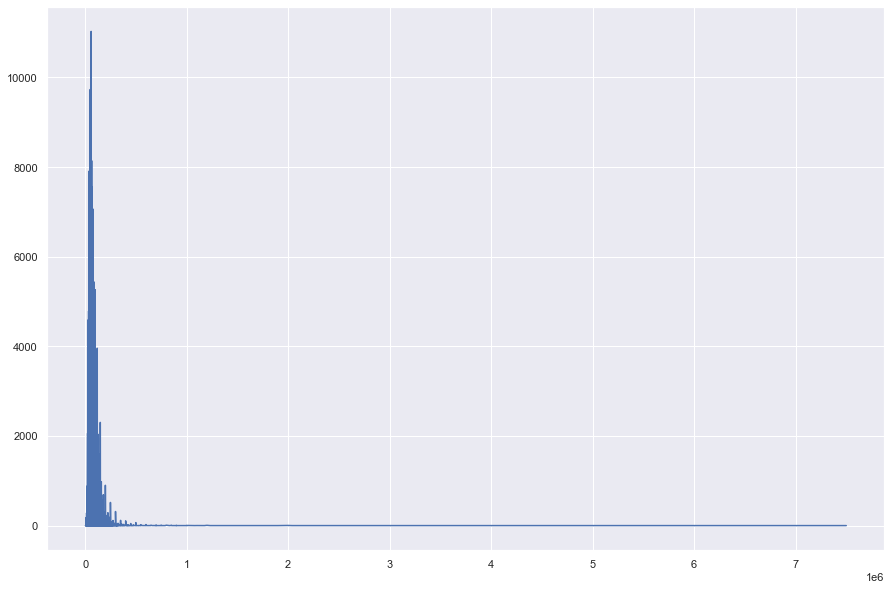

In [78]:
df['X13'].value_counts().sort_index().plot()

##### Replacing salary values with median will work better than mean

In [79]:
df['X13'] = df['X13'].fillna(df['X13'].median())
df_testing['X13'] = df_testing['X13'].fillna(df['X13'].median())

### X14 - Income verified

In [80]:
check_nulls(df['X14'])
check_nulls(df_testing['X14'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


In [81]:
df['X14'].value_counts()

VERIFIED - income           127040
not verified                107873
VERIFIED - income source    104076
Name: X14, dtype: int64

In [82]:
df['X14'] = df['X14'].str.replace('VERIFIED - income source', 'VERIFIED - income')
df_testing['X14'] = df_testing['X14'].str.replace('VERIFIED - income source', 'VERIFIED - income')

In [83]:
df['X14'].value_counts()

VERIFIED - income    231116
not verified         107873
Name: X14, dtype: int64

In [84]:
df_testing['X14'].value_counts()

VERIFIED - income    58027
not verified         21973
Name: X14, dtype: int64

In [85]:
df['X14'] = df['X14'].apply(lambda flag: 0 if flag.strip() == 'not verified' else 1)
df_testing['X14'] = df_testing['X14'].apply(lambda flag: 0 if flag.strip() == 'not verified' else 1)

In [86]:
df['X14'].value_counts()

1    231116
0    107873
Name: X14, dtype: int64

### X15 - Date loan was issued

In [87]:
check_nulls(df['X15'])
check_nulls(df_testing['X15'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


In [88]:
df['X15'].head()

0    Aug-09
1    May-08
2    Aug-14
3    Mar-10
4    Nov-09
Name: X15, dtype: object

In [89]:
df['X15'] = pd.to_datetime(df['X15'], format='%b-%y')
df['X15'].value_counts()

2014-07-01    24797
2014-04-01    16175
2014-05-01    16169
2014-08-01    15896
2014-06-01    14557
              ...  
2008-09-01       32
2007-08-01       31
2007-07-01       27
2007-09-01       17
2007-06-01        1
Name: X15, Length: 91, dtype: int64

In [90]:
df['X15_month'] = df['X15'].dt.month
df['X15_year'] = df['X15'].dt.year
df = df.drop(axis = 1, columns = ['X15'])

In [91]:
df_testing['X15'].head()

0    15-Mar
1    15-Mar
2    15-Mar
3    15-Mar
4    15-Mar
Name: X15, dtype: object

In [92]:
df_testing['X15'] = pd.to_datetime(df_testing['X15'], format='%y-%b')
df_testing['X15_month'] = df_testing['X15'].dt.month
df_testing['X15_year'] = df_testing['X15'].dt.year
df_testing = df_testing.drop(axis = 1, columns = ['X15'])

### X16 - Reason for loan

In [93]:
check_nulls(df['X16'])
check_nulls(df_testing['X16'])

Percentage of nulls = 69.0090238916307
# Null values = 233933
Percentage of nulls = 99.98125
# Null values = 79985


In [94]:
df['X16'].value_counts()

                                                                                                                                                                                                                                                                                                                                         190
Debt Consolidation                                                                                                                                                                                                                                                                                                                        10
  Borrower added on 03/10/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                                      9
 

#### Since there are so many unique values and values are input manually and since there are 70% null values, we can drop it

In [95]:
df = df.drop(axis = 1, columns = ['X16'])
df_testing = df_testing.drop(axis = 1, columns = ['X16'])

### X17 - Loan Category

In [96]:
check_nulls(df['X17'])
check_nulls(df_testing['X17'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


In [97]:
df['X17'].value_counts()

debt_consolidation    198226
credit_card            75680
home_improvement       19625
other                  17154
major_purchase          7312
small_business          5359
car                     4115
medical                 3329
moving                  2138
wedding                 1934
vacation                1848
house                   1723
educational              279
renewable_energy         267
Name: X17, dtype: int64

In [98]:
df_testing['X17'].value_counts()

debt_consolidation    49884
credit_card           18660
home_improvement       3920
other                  3383
major_purchase         1232
small_business          668
medical                 619
car                     573
moving                  393
vacation                359
house                   266
renewable_energy         42
wedding                   1
Name: X17, dtype: int64

#### Since we have 13 categories, we can do target encoding (becuase one hot encoding will add many features)

In [99]:
mean_target = df.groupby('X17')['X1'].mean()

In [100]:
# Replace the original categorical values with the mean target value
df['X17_target_encoded'] = df['X17'].map(mean_target)

# To prevent information leakage, using values from train dataset
df_testing['X17_target_encoded'] = df_testing['X17'].map(mean_target)

In [101]:
df = df.drop(axis = 1, columns = ['X17'])
df_testing = df_testing.drop(axis = 1, columns = ['X17'])

### X18 - Loan Title

In [102]:
check_nulls(df['X18'])
check_nulls(df_testing['X18'])

Percentage of nulls = 0.004719917165453746
# Null values = 16
Percentage of nulls = 0.0
# Null values = 0


In [103]:
# Since there are only 16 null values, we can drop them
df = df.dropna(axis = 0, subset = 'X18')

In [104]:
df_testing = df_testing.dropna(axis = 0, subset = 'X18')

In [105]:
df['X18'].value_counts().head(9)

Debt consolidation         105698
Credit card refinancing     40499
Debt Consolidation          13275
Home improvement             9888
Other                        8188
Consolidation                4504
debt consolidation           4075
Debt Consolidation Loan      3247
Major purchase               3010
Name: X18, dtype: int64

#### Since, loan title looks similar to loan category, we can drop it

In [106]:
df = df.drop(axis = 1, columns = ['X18'])
df_testing = df_testing.drop(axis = 1, columns = ['X18'])

### X19 - Zip code

In [107]:
check_nulls(df['X19'])
check_nulls(df_testing['X19'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


In [108]:
df_testing['X19'].value_counts()

945xx    894
750xx    852
112xx    759
300xx    747
606xx    717
        ... 
649xx      1
399xx      1
343xx      1
595xx      1
045xx      1
Name: X19, Length: 844, dtype: int64

#### Since we have 844 categories, we can do target encoding (becuase one hot encoding will add many features)

In [109]:
mean_target = df.groupby('X19')['X1'].mean()

In [110]:
# Replace the original categorical values with the mean target value
df['X19_target_encoded'] = df['X19'].map(mean_target)

# To prevent information leakage, using values from train dataset
df_testing['X19_target_encoded'] = df_testing['X19'].map(mean_target).fillna(df['X19_target_encoded'].mean())

In [111]:
df = df.drop(axis = 1, columns = ['X19'])
df_testing = df_testing.drop(axis = 1, columns = ['X19'])

## X20 - State of borrower

In [112]:
check_nulls(df['X20'])
check_nulls(df_testing['X20'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


In [113]:
df['X20'].value_counts()

CA    52833
NY    29224
TX    26492
FL    22754
IL    13483
NJ    13188
PA    11877
OH    11038
GA    10851
VA    10338
NC     9303
MI     8350
MA     8038
MD     8016
AZ     7746
WA     7706
CO     7118
MN     5864
MO     5397
CT     5242
NV     4753
IN     4608
OR     4411
WI     4245
TN     4215
AL     4188
LA     4017
SC     3979
KY     3172
KS     3096
OK     3013
AR     2532
UT     2531
NM     1848
HI     1798
WV     1738
NH     1648
RI     1486
DC     1080
MT      995
AK      947
DE      896
WY      853
SD      730
MS      707
VT      604
ID        8
IA        7
NE        6
ME        4
Name: X20, dtype: int64

#### Since we have 50 categories, we can do target encoding (becuase one hot encoding will add many features)

In [114]:
mean_target = df.groupby('X20')['X1'].mean()

In [115]:
# Replace the original categorical values with the mean target value
df['X20_target_encoded'] = df['X20'].map(mean_target)

# To prevent information leakage, using values from train dataset
df_testing['X20_target_encoded'] = df_testing['X20'].map(mean_target)

In [116]:
df = df.drop(axis = 1, columns = ['X20'])
df_testing = df_testing.drop(axis = 1, columns = ['X20'])

### X21 - A ratio calculated using the borrower‰Ûªs total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower‰Ûªs self-reported monthly income.

In [117]:
check_nulls(df['X21'])
check_nulls(df_testing['X21'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


<AxesSubplot:>

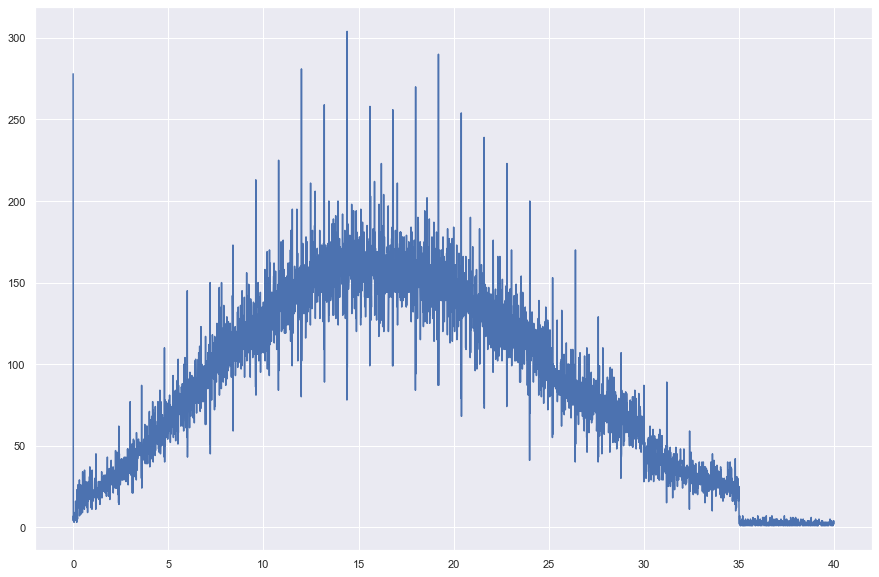

In [118]:
df['X21'].value_counts().sort_index().plot()

### X22 - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [119]:
check_nulls(df['X22'])
check_nulls(df_testing['X22'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


<AxesSubplot:>

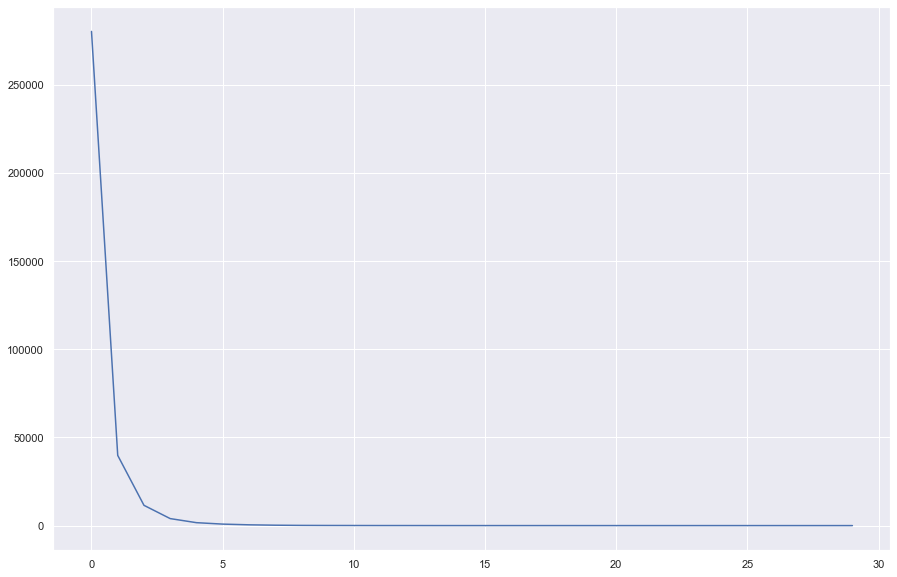

In [120]:
df['X22'].value_counts().sort_index().plot()

### X23 - Date the borrower's earliest reported credit line was opened

In [121]:
check_nulls(df['X23'])
check_nulls(df_testing['X23'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


In [122]:
df['X23_year'] = pd.to_datetime(df['X23'], format='%b-%y').dt.year

In [123]:
df_testing['X23_year'] = pd.to_datetime(df_testing['X23'], infer_datetime_format = True, errors = 'coerce').dt.year

In [124]:
df_testing['X23_year'].isnull().sum()

39359

In [125]:
df_testing['X23_year'] = df_testing['X23_year'].fillna(df['X23_year'].mode()[0])

In [126]:
df_testing['X23_year'].isnull().sum()

0

In [127]:
df = df.drop(axis = 1, columns = ['X23'])
df_testing = df_testing.drop(axis = 1, columns = ['X23'])

### X24 - Number of inquiries by creditors during the past 6 months.

In [128]:
check_nulls(df['X24'])
check_nulls(df_testing['X24'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


<AxesSubplot:>

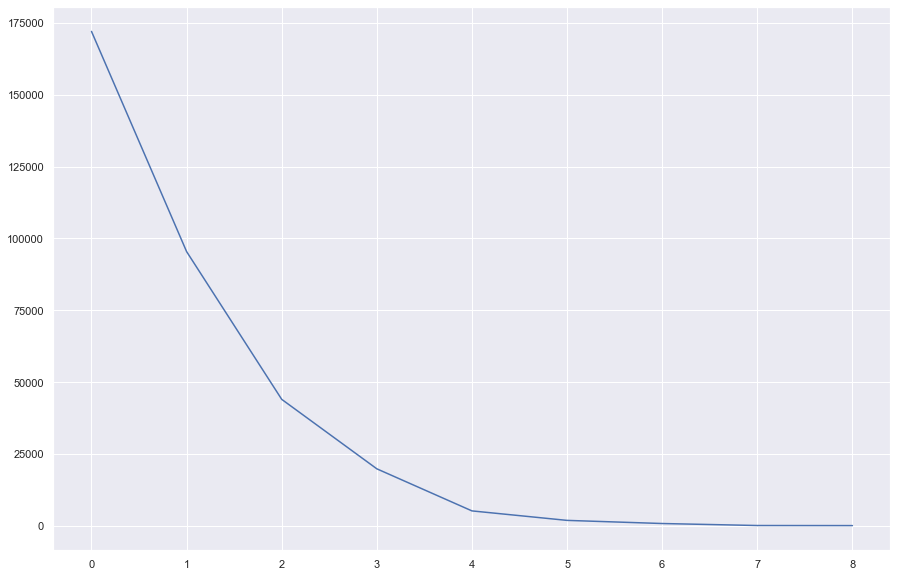

In [129]:
df['X24'].value_counts().sort_index().plot()

### X25	Number of months since the borrower's last delinquency.

In [130]:
check_nulls(df['X25'])
check_nulls(df_testing['X25'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


### X26	Number of months since the last public record.

In [131]:
check_nulls(df['X26'])
check_nulls(df_testing['X26'])

Percentage of nulls = 87.19691538854127
# Null values = 295574
Percentage of nulls = 82.70125
# Null values = 66161


### Since there are ~85% nulls, we'll have to drop it

In [132]:
df = df.drop(axis = 1, columns = ['X26'])
df_testing = df_testing.drop(axis = 1, columns = ['X26'])

### X27	Number of open credit lines in the borrower's credit file.

In [133]:
check_nulls(df['X27'])
check_nulls(df_testing['X27'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


<AxesSubplot:>

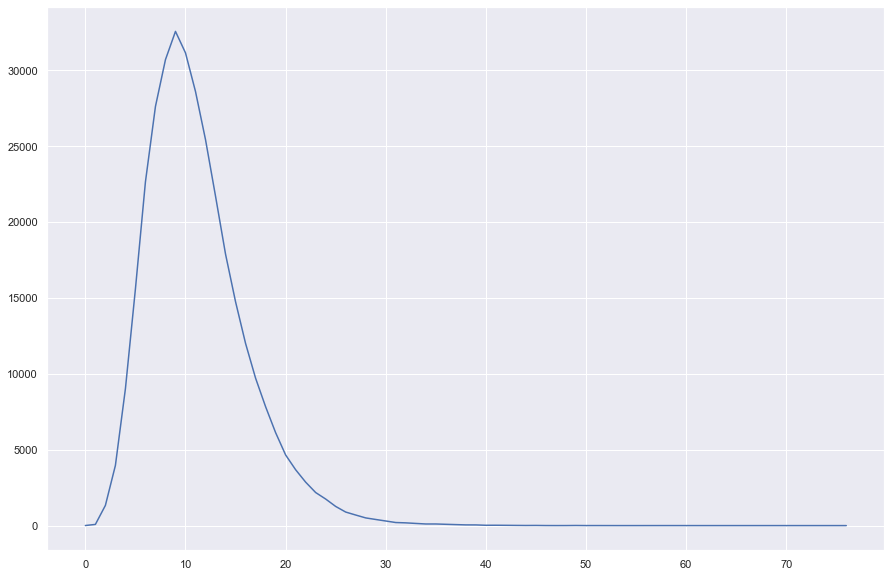

In [134]:
df['X27'].value_counts().sort_index().plot()

### X28	Number of derogatory public records

In [135]:
check_nulls(df['X28'])
check_nulls(df_testing['X28'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


In [136]:
df['X28'].value_counts()

0.0     296214
1.0      37292
2.0       3668
3.0       1076
4.0        346
5.0        186
6.0         90
7.0         47
8.0         19
9.0         11
10.0        10
11.0         3
13.0         2
49.0         1
54.0         1
17.0         1
34.0         1
21.0         1
63.0         1
40.0         1
18.0         1
14.0         1
Name: X28, dtype: int64

### X29	Total credit revolving balance

In [137]:
check_nulls(df['X29'])
check_nulls(df_testing['X29'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


<AxesSubplot:>

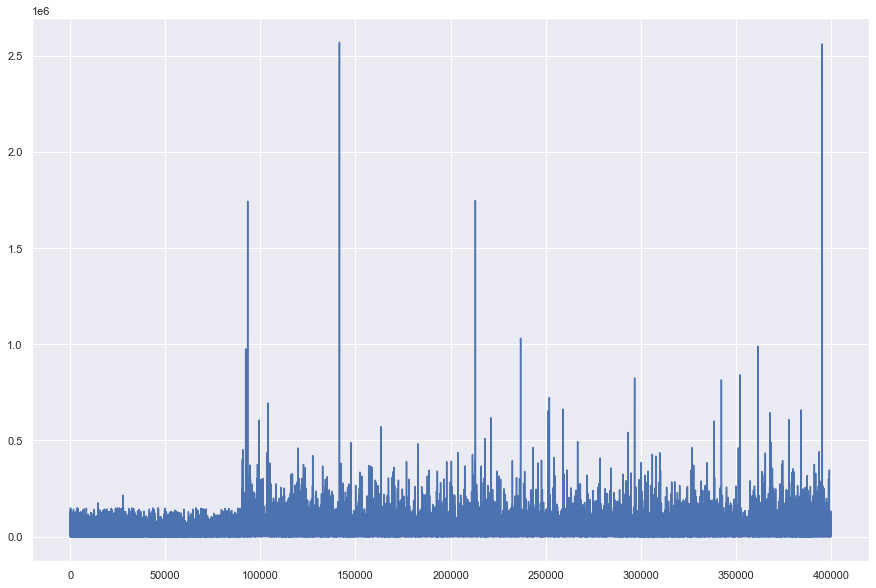

In [138]:
df['X29'].plot()

### X30	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [139]:
check_nulls(df['X29'])
check_nulls(df_testing['X29'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


<AxesSubplot:>

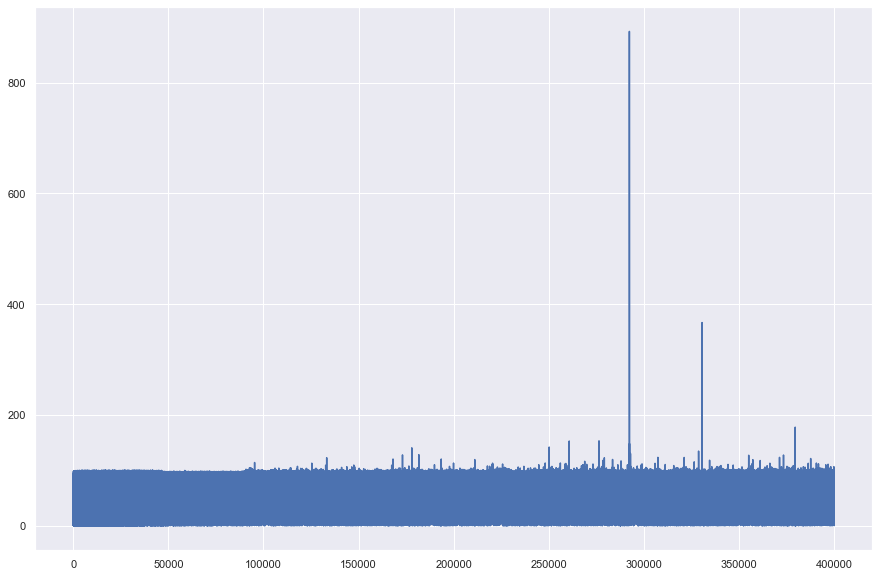

In [140]:
df['X30'].plot()

In [141]:
# Since there are only 224 null values, we can drop them
df = df.dropna(axis = 0, subset = 'X30')

## Since X29 and X30 are related to credit utilization rate, we can create a new column called utilitzation rate and drop X29, X30

In [142]:
df['utilization_rate'] = df['X30']/df['X29']
df_testing['utilization_rate'] = df_testing['X30']/df_testing['X29']

df_testing['utilization_rate'] = df_testing['utilization_rate'].fillna(df['utilization_rate'].median())
df['utilization_rate'] = df['utilization_rate'].fillna(df['utilization_rate'].median())
df['utilization_rate'].replace([np.inf, -np.inf], 0, inplace=True)
df_testing['utilization_rate'].replace([np.inf, -np.inf], 0, inplace=True)

In [143]:
df['utilization_rate'].isnull().sum()

0

In [144]:
df = df.drop(axis = 1, columns = ['X29', 'X30'])
df_testing = df_testing.drop(axis = 1, columns = ['X29', 'X30'])

<AxesSubplot:>

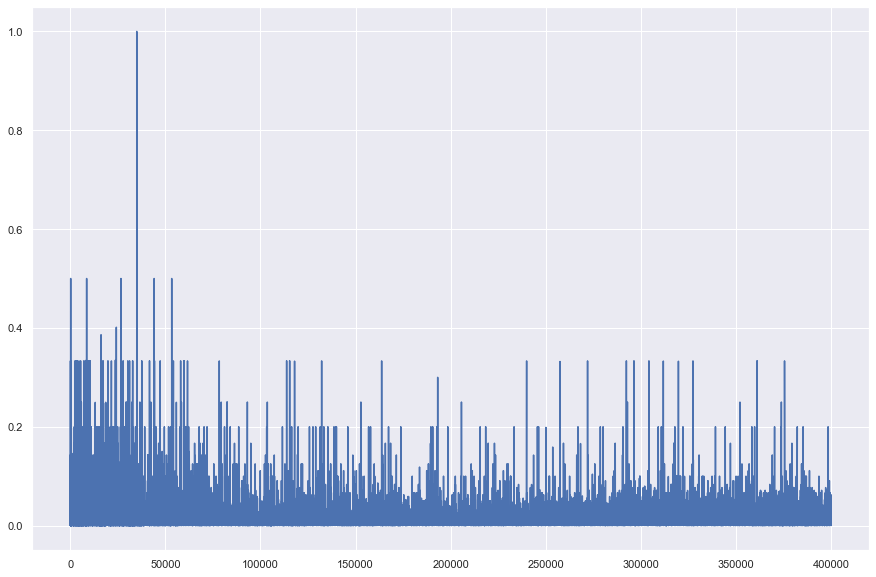

In [145]:
df['utilization_rate'].plot()

### X31	The total number of credit lines currently in the borrower's credit file.

In [146]:
check_nulls(df['X31'])
check_nulls(df_testing['X31'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


<AxesSubplot:>

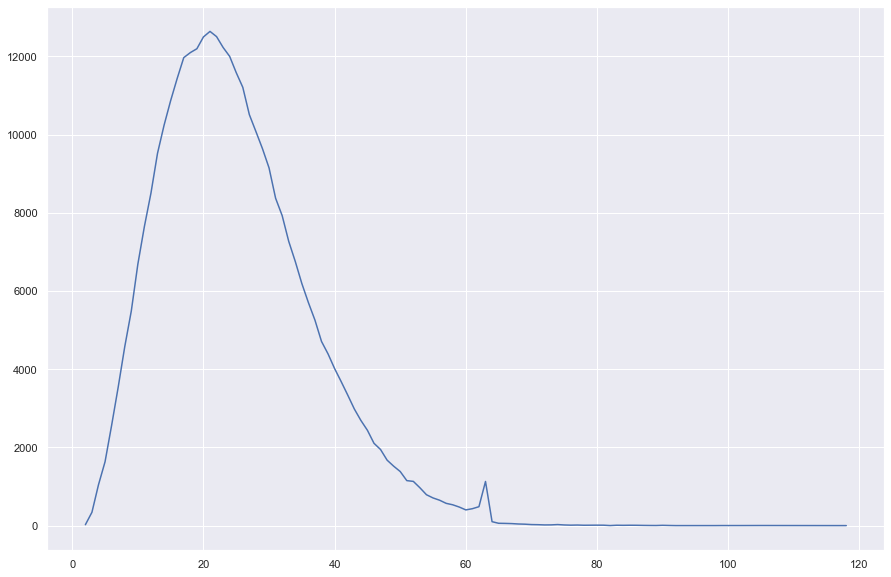

In [147]:
df['X31'].value_counts().sort_index().plot()

### X32	The initial listing status of the loan. Possible values are ‰ÛÒ W, F

In [148]:
check_nulls(df['X32'])
check_nulls(df_testing['X32'])

Percentage of nulls = 0.0
# Null values = 0
Percentage of nulls = 0.0
# Null values = 0


In [149]:
df['X32'].value_counts()

f    232424
w    106325
Name: X32, dtype: int64

In [150]:
df_testing['X32'].value_counts()

f    40440
w    39560
Name: X32, dtype: int64

In [151]:
df['X32'] = df['X32'].apply(lambda flag: 0 if flag.strip() == 'f' else 1)
df_testing['X32'] = df_testing['X32'].apply(lambda flag: 0 if flag.strip() == 'f' else 1)

In [152]:
df['X32'].value_counts()

0    232424
1    106325
Name: X32, dtype: int64

# Modelling

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338749 entries, 0 to 399999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   X1                  338749 non-null  float64
 1   X5                  338749 non-null  float64
 2   X7                  338749 non-null  int64  
 3   X8                  338749 non-null  int64  
 4   X9                  338749 non-null  int32  
 5   X11                 338749 non-null  int32  
 6   X12                 338749 non-null  int64  
 7   X13                 338749 non-null  float64
 8   X14                 338749 non-null  int64  
 9   X21                 338749 non-null  float64
 10  X22                 338749 non-null  float64
 11  X24                 338749 non-null  float64
 12  X25                 338749 non-null  float64
 13  X27                 338749 non-null  float64
 14  X28                 338749 non-null  float64
 15  X31                 338749 non-nul

In [154]:
np.isinf(df).values.sum()

0

In [155]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   X1                  0 non-null      float64
 1   X5                  80000 non-null  float64
 2   X7                  80000 non-null  int64  
 3   X8                  80000 non-null  int64  
 4   X9                  80000 non-null  int32  
 5   X11                 80000 non-null  int32  
 6   X12                 80000 non-null  int64  
 7   X13                 80000 non-null  float64
 8   X14                 80000 non-null  int64  
 9   X21                 80000 non-null  float64
 10  X22                 80000 non-null  int64  
 11  X24                 80000 non-null  int64  
 12  X25                 80000 non-null  float64
 13  X27                 80000 non-null  int64  
 14  X28                 80000 non-null  int64  
 15  X31                 80000 non-null  int64  
 16  X32 

In [156]:
np.isinf(df_testing).values.sum()

0

In [157]:
df_final = df.copy()

In [158]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from lightgbm import LGBMRegressor

from sklearn.metrics import accuracy_score,classification_report,r2_score,mean_squared_error,mean_absolute_error

In [159]:
y = df_final.pop('X1')
X = df_final

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

data = []

def model(model, name):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    score = round(r2_score(y_test, y_pred), 4)
    print(f'R2 score {score}')
    
    cv_score = round(cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 5).mean(), 4)
    print(f'CrossValidation score {cv_score}')
    
    mse = round(mean_squared_error(y_test, y_pred), 3)
    print(f'MSE: {mse}')

    data.append([name, score, cv_score, mse])

In [161]:
%%time
xgb = XGBRegressor(n_jobs = -1)
model(xgb, 'XGBoost')

R2 score 0.9113
CrossValidation score 0.9101
MSE: 1.684
CPU times: total: 12min 8s
Wall time: 41.4 s


In [162]:
%%time
lr = LinearRegression()
model(lr, 'Linear Regression')

R2 score 0.8145
CrossValidation score 0.814
MSE: 3.519
CPU times: total: 3.61 s
Wall time: 1.29 s


In [163]:
%%time
dtr = DecisionTreeRegressor()
model(dtr, 'Decision Tree Regressor')

R2 score 0.809
CrossValidation score 0.8062
MSE: 3.624
CPU times: total: 13.8 s
Wall time: 14.1 s


In [164]:
%%time
ada = AdaBoostRegressor()
model(ada, 'Ada Boost')

R2 score 0.7867
CrossValidation score 0.771
MSE: 4.047
CPU times: total: 1min 42s
Wall time: 1min 43s


In [165]:
%%time
gbr = GradientBoostingRegressor()
model(gbr, 'Gradient Boosting Regression')

R2 score 0.8802
CrossValidation score 0.8793
MSE: 2.273
CPU times: total: 4min 4s
Wall time: 4min 7s


In [166]:
%%time
rf = RandomForestRegressor(n_jobs = -1)
model(rf, 'Random Forest Regressor')

R2 score 0.9089
CrossValidation score 0.9066
MSE: 1.729
CPU times: total: 4min 59s
Wall time: 1min 22s


In [167]:
%%time
lgbm = LGBMRegressor(n_jobs = 4)
model(lgbm, 'Light GBM regressor')

R2 score 0.9085
CrossValidation score 0.9067
MSE: 1.735
CPU times: total: 19.8 s
Wall time: 5.07 s


In [168]:
df_scores = pd.DataFrame(data, columns = ['model', 'r2', 'cv', 'mse']).sort_values(by='r2', ascending=False)
df_scores

,model,r2,cv,mse
0,XGBoost,0.9113,0.9101,1.684
5,Random Forest Regressor,0.9089,0.9066,1.729
6,Light GBM regressor,0.9085,0.9067,1.735
4,Gradient Boosting Regression,0.8802,0.8793,2.273
1,Linear Regression,0.8145,0.8140,3.519
2,Decision Tree Regressor,0.8090,0.8062,3.624
3,Ada Boost,0.7867,0.7710,4.047


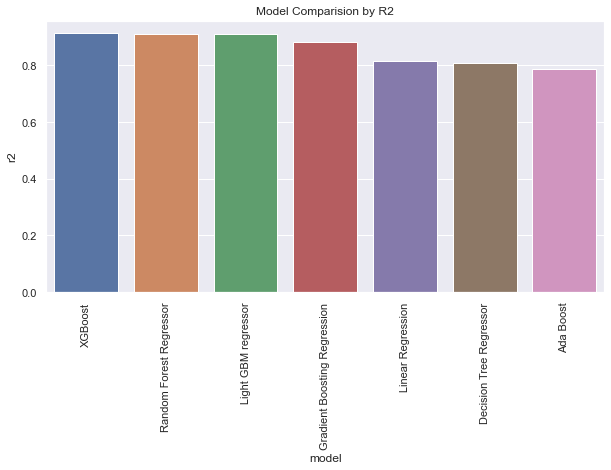

In [169]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'model', y = 'r2', data=df_scores,order=df_scores['model']).set_xticklabels(labels = df_scores['model'], rotation=90)
plt.title('Model Comparision by R2')
plt.show()

# HyperParameter Tuning for XGBoost

In [170]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [171]:
param_grid = {
    'n_estimators' : range(80, 115, 5),
    'learning_rate' : np.arange(0.2, 0.5, 0.02),
    'max_depth': np.arange(2, 8, 1)
}

In [172]:
rsearch = RandomizedSearchCV(estimator = xgb, 
                             param_distributions = param_grid, 
                             cv = 5, 
                             scoring = 'accuracy', 
                             n_jobs = -1, 
                             random_state = 1, 
                             n_iter = 8
                            )

In [173]:
%%time 
rsearch.fit(X_train,y_train)

CPU times: total: 42.5 s
Wall time: 2min 45s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=-1,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 ,
       0.42, 0.44, 0.46, 0.48]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7]),
                                        'n_estimators': range(80, 115, 5)},
                   random_state=1, scoring='accuracy')

In [174]:
%%time 
model(rsearch.best_estimator_, 'XGBoost_tuned')

R2 score 0.9112
CrossValidation score 0.9095
MSE: 1.685
CPU times: total: 3min 34s
Wall time: 54.2 s


In [175]:
print(rsearch.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.41999999999999993,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=110, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [176]:
xgb_tuned = rsearch.best_estimator_

In [177]:
df_scores = pd.DataFrame(data, columns = ['model', 'r2', 'cv', 'mse']).sort_values(by='r2', ascending=False)
df_scores

,model,r2,cv,mse
0,XGBoost,0.9113,0.9101,1.684
7,XGBoost_tuned,0.9112,0.9095,1.685
5,Random Forest Regressor,0.9089,0.9066,1.729
6,Light GBM regressor,0.9085,0.9067,1.735
4,Gradient Boosting Regression,0.8802,0.8793,2.273
1,Linear Regression,0.8145,0.8140,3.519
2,Decision Tree Regressor,0.8090,0.8062,3.624
3,Ada Boost,0.7867,0.7710,4.047


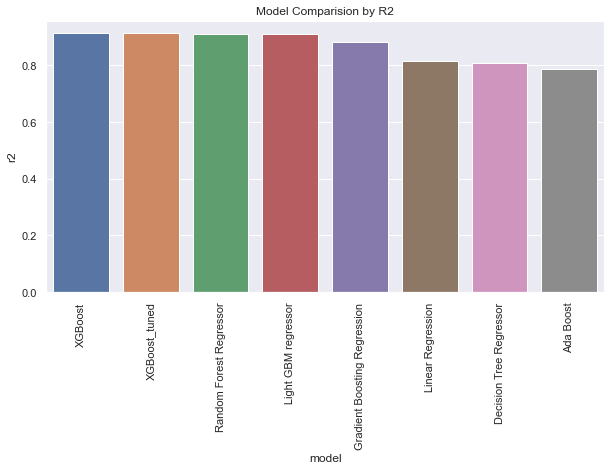

In [178]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'model', y = 'r2', data=df_scores,order=df_scores['model']).set_xticklabels(labels = df_scores['model'], rotation=90)
plt.title('Model Comparision by R2')
plt.show()

In [179]:
y = df_testing.pop('X1')
y_pred = xgb.predict(df_testing)
results = pd.DataFrame(y_pred)

In [180]:
results.rename(columns = {0:'X1'}, inplace = True)
results.head()

,X1
0,15.914798
1,6.269981
2,14.759917
3,16.524426
4,10.346273


In [182]:
results.to_csv('LoanRatePrediction_jasmeetsingh.csv')